<a href="https://colab.research.google.com/github/rushi-k12/Budget_Optimization/blob/main/Budget_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [18]:
df = pd.read_csv("/content/advertising.csv")
df

,Date,TV,Radio,Newspaper,Sales
0,"Thursday, January 1, 2015",230.1,37.8,69.2,22.1
1,"Thursday, January 8, 2015",44.5,39.3,45.1,10.4
2,"Thursday, January 15, 2015",17.2,45.9,69.3,9.3
3,"Thursday, January 22, 2015",151.5,41.3,58.5,18.5
4,"Thursday, January 29, 2015",180.8,10.8,58.4,12.9
...,...,...,...,...,...
341,"Saturday, March 16, 2019",27.0,42.0,93.0,14.0
342,"Sunday, March 17, 2019",150.0,21.0,57.0,22.0
343,"Monday, March 18, 2019",191.0,41.0,63.0,11.0
344,"Tuesday, March 19, 2019",219.0,41.0,65.0,21.0


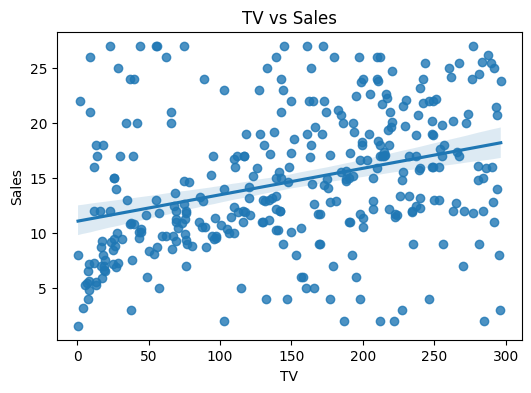

In [22]:
plt.figure(figsize=(6, 4))
sns.regplot(x='TV', y='Sales', data=df)
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('TV vs Sales')
plt.show()

<Axes: xlabel='Radio', ylabel='Sales'>

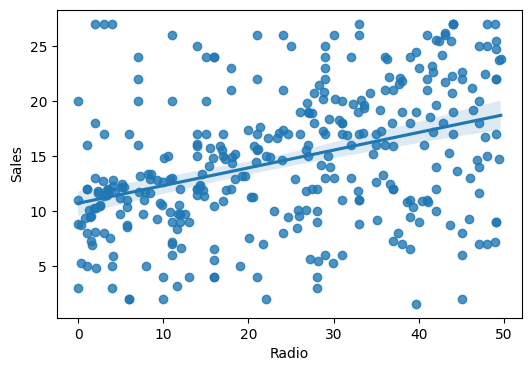

In [24]:
plt.figure(figsize=(6,4))
sns.regplot(x='Radio',y='Sales',data=df)


<Axes: xlabel='Newspaper', ylabel='Sales'>

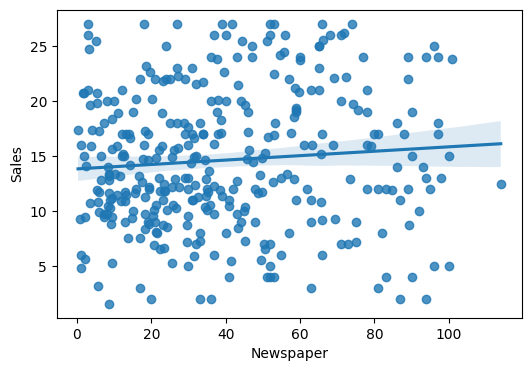

In [26]:
plt.figure(figsize=(6,4))
sns.regplot(x='Newspaper',y='Sales',data=df)

<ipython-input-29-aa355c3d392f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(),annot=True)


<Axes: >

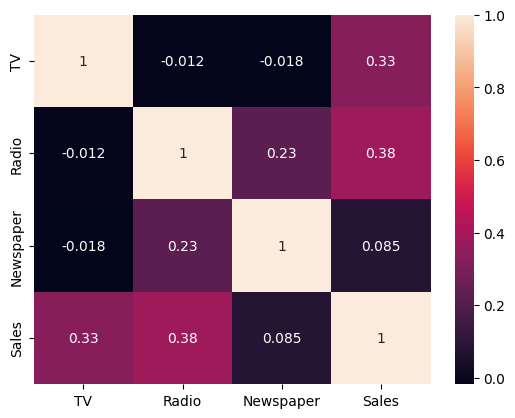

In [29]:
sns.heatmap(data=df.corr(),annot=True)

In [42]:
x = df[['TV' , 'Radio' , 'Newspaper']]
y = df[['Sales']]
x_train,x_test,y_train,y_test = train_test_split(x,y)
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [43]:
coeffs = model.coef_
intercept = model.intercept_

In [55]:
print(r2_score(y_test,model.predict(x_test)))
print(mean_squared_error(y_test,model.predict(x_test)))

0.24013681409351462
28.040734512807244


In [54]:
pd.DataFrame(zip(x.columns,coeffs),columns=['channel','coefficients'])

,channel,coefficients
0,TV,"[0.026331396496489592, 0.14223111731870552, 0...."


Optimization

In [56]:
from scipy.optimize import minimize
def objective(x):
  return -1*(coeffs[0]*x[0] + coeffs[1]*x[1] + coeffs[2]*x[2] + intercept)

def constraint(x):
  return 60000 - (coeffs[0]*x[0]+ coeffs[1]*x[1] + coeffs[2]*x[2] + intercept)

x0 = np.array([1/3,1/3,1/3])

solution = minimize(objective,x0,constraints={'type': 'eq' , 'fun': constraint})

IndexError: index 1 is out of bounds for axis 0 with size 1

In [60]:
# prompt: optimize using objective and constraint functions by creating coefficients and intercept too, use zip too

# Create coefficients and intercept
coeffs = model.coef_
intercept = model.intercept_

# Optimization
def objective(x):
  return -1*(coeffs[0]*x[0] + coeffs[1]*x[1] + coeffs[2]*x[2] + intercept)

def constraint(x):
  return 60000 - (coeffs[0]*x[0]+ coeffs[1]*x[1] + coeffs[2]*x[2] + intercept)

x0 = np.array([1/3,1/3,1/3])

solution = minimize(objective,x0,constraints={'type': 'eq' , 'fun': constraint})

# Use zip to create a DataFrame
optimal_allocation = pd.DataFrame(zip(x.columns,solution.x),columns=['Channel','Allocation'])
print(optimal_allocation)


IndexError: index 1 is out of bounds for axis 0 with size 1

In [61]:
from sklearn.linear_model import LinearRegression

# Assuming model is your fitted Linear Regression model
# Example: model = LinearRegression().fit(X, y)

# Get the coefficients and intercept from the model
coeffs = model.coef_
intercept = model.intercept_

print("Coefficients:", coeffs)
print("Intercept:", intercept)


Coefficients: [[0.0263314  0.14223112 0.00069324]]
Intercept: [7.07524217]


In [67]:
pd.DataFrame(zip(x.columns,coeffs),columns=['channel','coefficients'])

,channel,coefficients
0,TV,"[0.026331396496489592, 0.14223111731870552, 0...."


In [69]:
import pandas as pd

# Assuming x.columns contains the feature names and coeffs contains the coefficients
x_columns = ['TV', 'Radio', 'Newspaper']

# Flatten the coefficients array
coeffs_flat = [item for sublist in coeffs for item in sublist]

# Create a DataFrame with feature names and coefficients
df_coefficients = pd.DataFrame(zip(x_columns * len(coeffs), coeffs_flat), columns=['channel', 'coefficients'])

# Display the DataFrame
print(df_coefficients)


     channel  coefficients
0         TV      0.026331
1      Radio      0.142231
2  Newspaper      0.000693


In [72]:
# prompt: optimize using objective and constraint functions by creating coefficients and intercept too, use zip too

# Create coefficients and intercept
import pandas as pd

# Assuming x.columns contains the feature names and coeffs contains the coefficients
x_columns = ['TV', 'Radio', 'Newspaper']

# Flatten the coefficients array
coeffs_flat = [item for sublist in coeffs for item in sublist]

# Create a DataFrame with feature names and coefficients
df_coefficients = pd.DataFrame(zip(x_columns * len(coeffs), coeffs_flat), columns=['channel', 'coefficients'])

# Display the DataFrame
print(df_coefficients)

# Optimization
def objective(x):
  return -1*(df_coefficients[0]*x[0] + df_coefficients[1]*x[1] + df_coefficients[2]*x[2] + intercept)

def constraint(x):
  return 60000 - (df_coefficients[0]*x[0]+ df_coefficients[1]*x[1] + df_coefficients[2]*x[2] + intercept)

x0 = np.array([1/3,1/3,1/3])

solution = minimize(objective,x0,constraints={'type': 'eq' , 'fun': constraint})

# Use zip to create a DataFrame
optimal_allocation = pd.DataFrame(zip(x.columns,solution.x),columns=['Channel','Allocation'])
print(optimal_allocation)


     channel  coefficients
0         TV      0.026331
1      Radio      0.142231
2  Newspaper      0.000693


KeyError: 0

In [73]:
import pandas as pd

# Assuming coeffs contains the coefficients

# Create coefficients and intercept
intercept = 0  # Assuming intercept is known

# Create a DataFrame with feature names and coefficients
x_columns = ['TV', 'Radio', 'Newspaper']
coeffs_flat = [item for sublist in coeffs for item in sublist]
df_coefficients = pd.DataFrame(zip(x_columns * len(coeffs), coeffs_flat), columns=['channel', 'coefficients'])

# Display the DataFrame
print(df_coefficients)

# Optimization
def objective(x):
    return -1 * (df_coefficients.loc[0, 'coefficients'] * x[0] +
                 df_coefficients.loc[1, 'coefficients'] * x[1] +
                 df_coefficients.loc[2, 'coefficients'] * x[2] + intercept)

def constraint(x):
    return 60000 - (df_coefficients.loc[0, 'coefficients'] * x[0] +
                    df_coefficients.loc[1, 'coefficients'] * x[1] +
                    df_coefficients.loc[2, 'coefficients'] * x[2] + intercept)

x0 = np.array([1/3, 1/3, 1/3])

solution = minimize(objective, x0, constraints={'type': 'eq', 'fun': constraint})

# Use zip to create a DataFrame
optimal_allocation = pd.DataFrame(zip(x_columns, solution.x), columns=['Channel', 'Allocation'])
print(optimal_allocation)


     channel  coefficients
0         TV      0.026331
1      Radio      0.142231
2  Newspaper      0.000693
     Channel     Allocation
0         TV   75428.446042
1      Radio  407870.866948
2  Newspaper    2790.598855


In [75]:
total_sales = -solution.fun
tv_percentage = df_coefficients.loc[df_coefficients['channel'] == 'TV', 'coefficients'].iloc[0] * solution.x[0] / total_sales
radio_percentage = df_coefficients.loc[df_coefficients['channel'] == 'Radio', 'coefficients'].iloc[0] * solution.x[1] / total_sales
newspaper_percentage = df_coefficients.loc[df_coefficients['channel'] == 'Newspaper', 'coefficients'].iloc[0] * solution.x[2] / total_sales



In [77]:
print('coefficients:',df_coefficients)
print('intercept:',intercept)
print('optimal_allocation:',optimal_allocation)
print('TV Percentage:',tv_percentage*100)
print('Radio Percentage:',radio_percentage*100)
print('Newspaper Percentage:',newspaper_percentage*100)

coefficients:      channel  coefficients
0         TV      0.026331
1      Radio      0.142231
2  Newspaper      0.000693
intercept: 0
optimal_allocation:      Channel     Allocation
0         TV   75428.446042
1      Radio  407870.866948
2  Newspaper    2790.598855
TV Percentage: 3.310227199746131
Radio Percentage: 96.68654854680648
Newspaper Percentage: 0.0032242534474022427
